In [1]:
#NumPy的主要对象的同种元素的多维数组
#维度(dimensions)叫做轴(axes)
#轴的个数叫做秩(rank),如[1,2,3]轴为3,秩为1
#[[1,3,0],[0,1,2]]的秩为2,第一个维度长度为2,第一个维度长度为3
#NumPy的数组类被称为ndarray,通常被称作数组
#注意numpy.arrray和标准array.array并不相同,后者只能处理一维数组

#ndarray.shape数组的维度,这是一个指示数组在每个维度上大小的整数元组
#ndarray.size数组元素的总个数,等于shape属性中元组元素的乘积
#ndarray.dtype一个用来描述数组中元素类型的对象
#ndarray.itemsize,数组中每个元素字节大小
#ndarray.data包含实际数组元素的缓冲区,通常我们通过索引引用数组元素,不使用这个属性


In [2]:
from numpy import *
#创建数组
#使用array函数,利用常规的python列表和元组创造数组.所创建的数组类型由原来的元素类型决定,array([数据])

#使用占位符,zeros,ones,empty创建一个内容随机并且依赖于内存状态的数组,
print(zeros((3,4)));print(ones((2,3,4),dtype=int16));print(empty((2,3)))

#arange函数返回数组,begin,end,iteration
print(arange(10,30,5));print(arange(0,2,0.3))
c=arange(24).reshape(2,3,4)
print(c)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
[[0. 0. 0.]
 [0. 0. 0.]]
[10 15 20 25]
[0.  0.3 0.6 0.9 1.2 1.5 1.8]
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [10]:
#基本运算
#数组的算术运算是按元素进行
#numpy中的乘法运算符*指示按元素计算
#矩阵乘法可以使用dot函数或创建矩阵对象实现
#非数组的运算可以利用ndarray类方法实现
#提供通用函数(ufunc),如sin,cos,exp
#在numpy里这些函数作用按数组的元素运算,产生一个数组作为输出
#切片,索引,迭代
a=random.random((2,3))
print(a)
print(a.sum())#min,max
b=arange(12).reshape(3,4)
print(b)
print(b.sum(axis=1))
print(b.cumsum(axis=1))#计算某一个行的累积和


[[0.87867877 0.26899377 0.52356082]
 [0.50100188 0.31253109 0.53953517]]
3.024301507756441
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 6 22 38]
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]


In [3]:
#矩阵运算
#numpy对于多维数组的运算,缺省情况下并不使用矩阵运算,对数组进行矩阵运算,可调用相应的函数
#numpy提供matrix类,使用matrix类创建的是矩阵对象,它们的加减乘除运算采用矩阵方式计算
a=arange(9).reshape(3,3)
a*a-1
#更高级的运算:numPy线性代数子库linalg
#inv,计算逆矩阵;solve,求解多元一次方程组


array([[-1,  0,  3],
       [ 8, 15, 24],
       [35, 48, 63]])

In [ ]:
from numpy import *
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('C:\\Users\\hzg0601\\Pictures\\QQ截图20180305214810.png')
plt.figure((1,1))
plt.imshow(img)
plt.show()
i=1
c=0.299792458#光速
x=zeros((6,4))#存储卫星(x,y,z,t) 参数
while i<=6:#i从1开始
    print('%s %d'%('please input (x,y,z,t) of group',i))
    temp=input()
    x[i-1]=temp.split()
    j=0
    while j<4:
        x[i-1][j]=float(x[i-1][j])
        j=j+1
    i=i+1
a=zeros((4,4))#系数矩阵
b=zeros((4,1))#常数项
j=0
while j<4:
    a[j][0]=2*(x[5][0]-x[j][0])
    a[j][1]=2*(x[5][1]-x[j][1])
    a[j][2]=2*(x[5][2]-x[j][2])
    a[j][3]=2*c**2*(x[j][3]-x[5][3])
    b[j][0]=x[5][0]**2+x[5][1]**2+x[5][2]**2-x[j][0]**2-x[j][1]**2-x[j][2]**2+c**2*(x[j][3]**2-x[5][3]**2)
    j=j+1
a=linalg.inv(a)
print(dot(a,b))

In [ ]:
#-*- coding:utf-8 -*-  
from PIL import Image  
import sys  
import os  
  
def _main():  
  try:  
    pic      = os.path.abspath(sys.argv[1])  #获取图片路径参数  
  except:  
    print('C:\\Users\\hzg0601\\Pictures\\QQ截图20180305214810.png')  
  img      = Image.open(pic)  #获取图片对象  
  width    = img.width  #获取图片宽度  
  height   = img.height #获取图片高度  
  
  gray_img = img.convert('L')  #图片转换为'L'模式  模式“L”为灰色图像，它的每个像素用8个bit表示，0表示黑，255表示白，其他数字表示不同的灰度  
  
  scale    = width // 100  #图片缩放100长度  
  char_lst = ' .:-=+*#%@'  #要替换的字符  
  char_len = len(char_lst)  #替换字符的长度  
  
  for y in range(0, height, scale):  #根据缩放长度 遍历高度  
    for x in range(0, width, scale):  #根据缩放长度 遍历宽度  
        choice =gray_img.getpixel((x, y)) * char_len // 255  #获取每个点的灰度  根据不同的灰度填写相应的 替换字符  
        if choice==char_len:  
            choice=char_len-1  
        sys.stdout.write(char_lst[choice])  #写入控制台  
    sys.stdout.write('\n')  
    sys.stdout.flush()  
  
if __name__ == '__main__':  
    _main()  

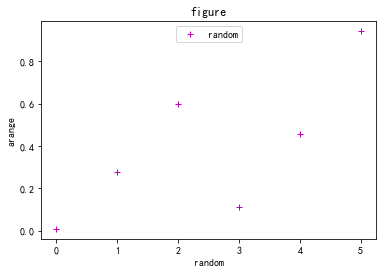

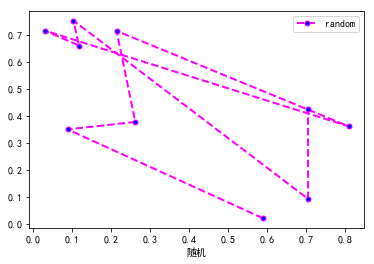

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import random as rm

#help(plt.rcParams)
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

#help(rm)
plt.plot(np.arange(6),[rm.random() for i in range(6)],'m+',label='random')#color marker/line;label for line
plt.legend(loc=9)
plt.ylabel('arange')
plt.xlabel('random')
plt.title('figure')
#help(plt.plot)
plt.show()

plt.plot([rm.random() for i in range(10)],[rm.random() for i in range(10)],color='magenta',linestyle='--',marker='o'\
       ,markersize=5,markerfacecolor='b',label='random',linewidth=2)
plt.legend(loc=1)
plt.xlabel('随机')
#help(plt.legend)
plt.show()

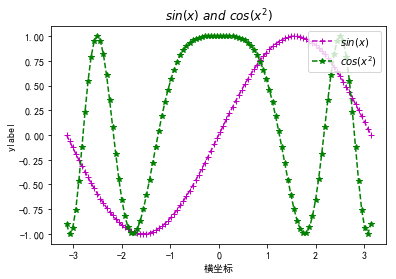

In [56]:
import numpy as np
from matplotlib.pyplot import *
import random as rm
rmarray=[[rm.random() for i in range(5)] for i in range(3)]
X=np.linspace(-np.pi,np.pi,100,endpoint=True)
C,S=np.cos(X*X),np.sin(X)
plot(X,S,'m+',label='$sin(x)$',linestyle='--')
plot(X,C,'g*',label='$cos(x^2)$',linestyle='--')
xlabel('横坐标')
ylabel('ylabel')
legend(loc=1)
title('$sin(x)\ and\ cos(x^2)$')
show()

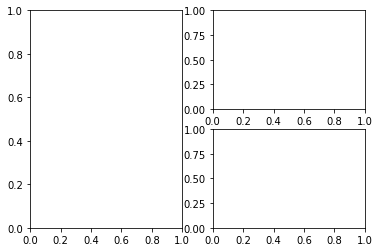

In [5]:
#subplot(nROws,mCols,plotNum),绘制多个图表,将整个绘图区域被等分n行和m列,然后按照从左到右,从上到下的顺序对每个区域进行编号,左上区域的编号为1
from matplotlib.pyplot import *
subplot(2,2,1)
subplot(2,2,2)
subplot(121)#1行2列,第一列
subplot(224)
show()


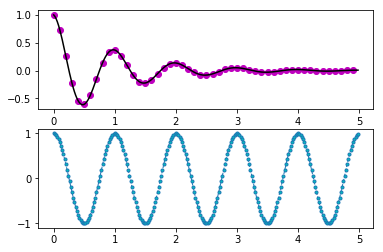

In [19]:
import numpy as np
import matplotlib.pyplot as plt
def f(t):
    return np.exp(-t)*np.cos(2*np.pi*t)

t1=np.arange(0.0,5.0,0.1)
t2=np.arange(0.0,5.0,0.02)

plt.subplot(2,1,1)
plt.plot(t1,f(t1),'mo',t2,f(t2),'k')#k,代表black,如果不指定,则默认为solid,line
plt.subplot(2,1,2)
plt.plot(t2,np.cos(2*np.pi*t2),linestyle='--',marker='o',linewidth=1,markersize=3,markerfacecolor='c')#cyan,青色
plt.show()
#help(plt.plot)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mu,sigma=100,15
x=mu+sigma*np.random.randn(10000)#10000个标准正态分布
plt.hist(x,50,normed=1,facecolor='g')#标准化
plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60,0.25,r'$\mu=100,\\sigma=15$')#指定位置添加文本
plt.axis([40,160,0,0.03])
plt.show()
#help(np.random.randn)标准正态分布

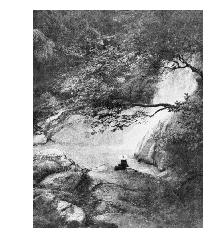

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('C:\\Users\\hzg0601\\Documents\\5b011da4125cac4_w468_h600.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [32]:
from PIL import Image

codeLib = '''@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/\|()1{}[]?-_+~<>i!lI;:,"^`'. '''#生成字符画所需的字符集
count = len(codeLib)

def transform1(image_file):
    image_file = image_file.convert("L")#转换为黑白图片，参数"L"表示黑白模式
    codePic = ''
    for h in range(0,image_file.size[1]):  #size属性表示图片的分辨率，'0'为横向大小，'1'为纵向
        for w in range(0,image_file.size[0]):
            gray = image_file.getpixel((w,h)) #返回指定位置的像素，如果所打开的图像是多层次的图片，那这个方法就返回一个元组
            codePic = codePic + codeLib[int(((count-1)*gray)/256)]#建立灰度与字符集的映射
        codePic = codePic+'\r\n'
    return codePic

def transform2(image_file):
    codePic = ''
    for h in range(0,image_file.size[1]):
        for w in range(0,image_file.size[0]):
            g,r,b = image_file.getpixel((w,h))
            gray = int(r* 0.299+g* 0.587+b* 0.114)
            codePic = codePic + codeLib[int(((count-1)*gray)/256)]
        codePic = codePic+'\r\n'
    return codePic


fp = open('C:\\Users\\hzg0601\\Pictures\\image2.gif','rb')
image_file = Image.open(fp)
image_file=image_file.resize((int(image_file.size[0]*0.75), int(image_file.size[1]*0.5)))#调整图片大小
print ('Info:',image_file.size[0],' ',image_file.size[1],' ',count)

tmp = open('tmp.txt','w')
tmp.write(transform1(image_file))
tmp.close()

Info: 420   280   69


In [60]:
import numpy as np
import matplotlib.pyplot as plt

def initCenters(dataSet,k):
    numSamples,dim=dataSet.shape#获得数据集的行数和列数
    centers=np.zeros((k,dim))#生成4行列数为数据列数的0矩阵
    for i in range(k):#对于4个初始中心
        index=int(np.random.uniform(0,numSamples))#random get k centers,以随机数生产一个(0-行数)之间的整数
        centers[i,:]=dataSet[index,:]#将该整数所在的行赋值给0矩阵,作为初始中心
    print(centers)
    return centers
def Dist2Centers(sample,centers):
    k=centers.shape[0]
    dis2cents=np.zeros(k)#
    for i in range(k):
        dis2cents[i]=np.sqrt(np.sum(np.power(sample-centers[i,:],2)))#对于每一个中心,计算每一个样本(每一行)与中心的欧式距离
    return dis2cents

def kmean(dataSet,k,iterNum):
    numSamples=dataSet.shape[0]#获得数据集的样本数(数据集的行数)
    iterCount=0
    #clusterAssignment stores which cluster this sample begongs to
    clusterAssignment=np.zeros(numSamples)#生成样本数的0
    clusterChanged=True
    
    ##step 1: initialize centers
    centers=initCenters(dataSet,k)
    while clusterChanged and iterCount<iterNUm:#小于最大迭代数
        clusterChanged=False#########如果样本满足最小距离条件,跳出循环
        iterCount=iterCount+1
        ##for each sample
        for i in range(numSample):#对于每个样本
            dis2cent=Dist2Centers(dataSet[i,:],centers)#计算样本与中心的距离
            minIndex=np.argmin(dis2cent)#找出最小距离的样本索引
            ##step 3: update its belonged cluster
            if clusterAssignment[i]!=minIndex:#如果样本的索引不是最小距离索引
                clusterChanged=True######进入下次循环
                clusterAssignment[i]=minIndex#将最小距离索引赋给样本索引
        ##step 4: update centers
        for j in range(k):#对于每个中心
            pointsInCluster=dataSet[np.nonzero(clusterAssignment[:]==j)[0]]#找出数据集中,属于该中心的样本
            #先找出属于该中心的样本的索引,再找出样本,即样本所在的行
            centers[j,:]=np.mean(pointsInCluster,axis=0)#计算列均值,作为中心
    print('Congratulations,Cluster Achieved!')
    return centers,clusterAssignment

def showCluster(dataSet,k,centers,clusterAssignment):
    numSamples,dim=dataSet.shape#样本数,属性个数
    mark=['or','ob','om']#定义样本点类的样式和颜色
    #draw all samples
    for i in range(numSamples):#对于每个样本
        markIndex=int(clusterAssignment[i])#将样本的中心索引复制给mark
        plt.plot(dataSet[i,0],dataSet[i,1],mark[markIndex])#以第一行为横坐标,第二行为纵坐标,以样本类样式画出该样本
    mark=['Dr','Db','Dm']#定义聚类中心样式
    #draw the centroids
    for i in range(k):
        plt.plot(centers[i,0],centers[i,1],mark[i],markersize=17)#以样本中心第一行为横坐标,以第二行为纵坐标,以样本中心样式画出中心
    plt.show()


def main():
    print('step 1: loading data...')
    dataSet=[]
    #lineArr=[]
    dataSetFile=open('C:\\Users\\hzg0601\\Desktop\\other\\city.txt','r+')
    
    dataSetFile=dataSetFile.readlines()
    for line in dataSetFile:
        lineArr=line.strip().split('\t')
        #lineArr=lineArr[1:]
        dataSet.append(float(lineArr[i]) for i in range(1,len(lineArr))
        
    print('step 2: clustering...')
                       
    dataSet=np.mat(dataSet)
    
    k=4
    centers_result,clusterAssignment_result=(dataSet,k,100)
    
    print('step 3: showing the result...')
    showCluster(dataSet,k,centers_result,clusterAssignment_result)
    
if __name__=='__main__':
    main()
    

SyntaxError: invalid syntax (<ipython-input-60-a9967e4b4759>, line 73)

In [52]:
dataSet=[]
lineArr=[]
dataSetFile=open('C:\\Users\\hzg0601\\Desktop\\other\\city.txt','r+')
#dataSetFile=dataSetFile.readlines()
for line in dataSetFile:
    lineArr=line.strip().split('\t')
    lineArr=lineArr[1:]
    [float(f) for f in lineArr]
    
   
    dataSet.append(lineArr)
    
print(dataSet) 
    #dataSet.append([float(lineArr[1]),float(lineArr[2])])

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
[['-0.012897418', '-0.019749286', '1.743333639', '20.5071704', '0.275273943', '0.197777486'], ['-0.004927995', '0.114907029', '1.35231444', '20.58415883', '0.31867141', '0.128601503'], ['-0.01333392', '0.014128158', '1.142676985', '20.72158865', '0.281904804', '0.3135175'], ['0.407017828', '-0.060783564', '1.692687146', '21.4553937', '0.136743783', '0.29620786'], ['-0.178876714', '-0.124594312', '1.535144429', '21.4496832', '0.145836956', '0.847363426'], ['-0.1463762', '-0.041664971', '1.638114511', '21.46746709', '0.225809811', '0.610947572'], ['-0.034013078', '-0.063410057', '1.525118351', '21.6574916', '0.198138438', '0.461253191'], ['0.001747328', '0.003209341', '2.516319442', '21.73451067', '0.135960027', '0.425692232'], ['-0.010222629', '0.006795188', '5.531871797', '21.67726036', '0.139805102', '0.471287369'], ['0.004079501', '-0.0